*italicized text*# Graph Data Analytics

In [2]:
#!conda install networkx --yes

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
G = nx.karate_club_graph()
print(nx.info(G))

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


C:\Users\amic7\AppData\Local\Temp\ipykernel_31516\2580942427.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


### Calculate page rank by using simple degree centrality

array([16,  9, 10,  6,  3,  4,  4,  4,  5,  2,  3,  1,  2,  5,  2,  2,  2,
        2,  2,  3,  2,  2,  2,  5,  3,  3,  2,  4,  3,  4,  4,  6, 12, 17])

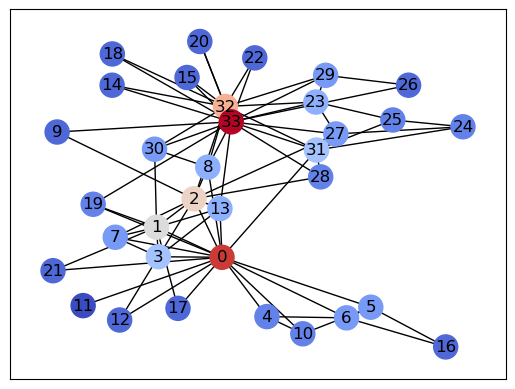

In [4]:
def simple_pagerank(G):
    p = np.array([G.degree(node) for index, node in enumerate(G.nodes())])
    return p

centralities = simple_pagerank(G)
nx.draw_networkx(G, cmap=plt.get_cmap('coolwarm'), node_color = centralities, with_labels=True)
centralities

### Calculate page rank by updating the centrality of each node with the iteration

C:\Users\amic7\AppData\Local\Temp\ipykernel_25552\805218200.py:16: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


Graph named "Zachary's Karate Club" with 34 nodes and 78 edges
(34,)


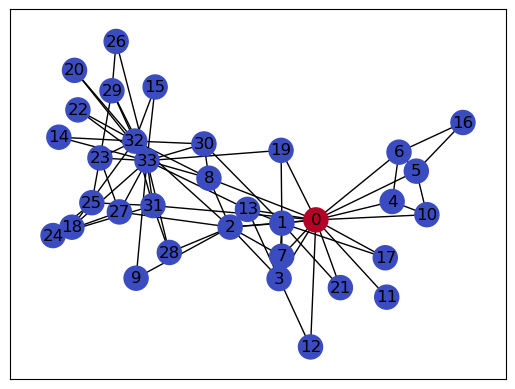

In [20]:
def pagerank_centrality(G, iter=100):
    p = np.array([1 for i in list(G.nodes())])
    print(p.shape)
    for k in range(iter):
        for i in G.nodes():
            for j in G.nodes():
                # update the centrality
                p[i] += int(G.number_of_edges(i, j) * p[j] / G.degree[j])
               
         # TODO: Normalize the centrality value to avoid overflow of numerical computation
        norm = sum(p)
        p = p / norm        
    return p

G = nx.karate_club_graph()
print(nx.info(G))
values = pagerank_centrality(G)
nx.draw_networkx(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

In [8]:
G = nx.read_edgelist("gr0.California.edges.txt")
G.remove_nodes_from(list(nx.isolates(G)))
print(nx.info(G))
G1 = G.subgraph(list(G.nodes())[100:150])
print(nx.info(G1))

Graph with 6175 nodes and 15969 edges
Graph with 50 nodes and 42 edges


C:\Users\amic7\AppData\Local\Temp\ipykernel_25552\973125873.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))
C:\Users\amic7\AppData\Local\Temp\ipykernel_25552\973125873.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G1))


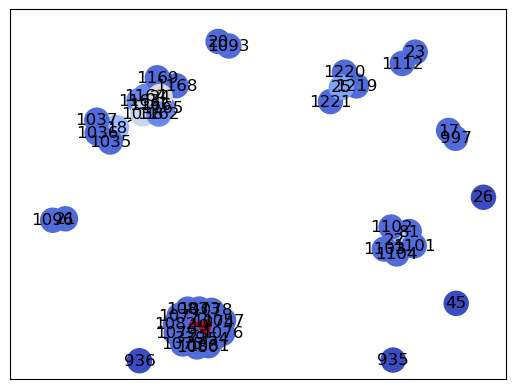

In [10]:
values = simple_pagerank(G1)
nx.draw_networkx(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

(50,)


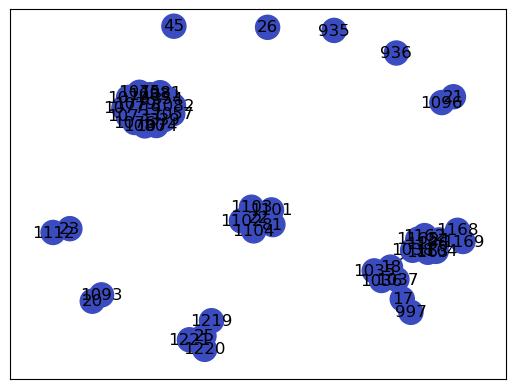

In [11]:
values = pagerank_centrality(G1)
nx.draw_networkx(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)